In [68]:
!pip install bokeh
!pip install seaborn
!pip install wordcloud

Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
  Using cached https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/packages/packages/70/bd/5e6bf595fe6ee0f257ae49336dd180768c1ed3d7c7155b2fdf894c1c808a/seaborn-0.10.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in indexes: https://artifact.intuit.com/artifactory/api/pypi/pypi-intuit/simple, https://artifact.intuit.com/artifactory/api/pypi/pypi-local-data-science/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pandas as pd
import numpy as np
import geopandas
import json

from bokeh.io import show
from bokeh.io import output_notebook, show, output_file
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [69]:
from matplotlib import pyplot as plt
import seaborn as sns
import wordcloud

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
terrorism_df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")
column_rename = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
terrorism_df.rename(columns=column_rename,inplace=True)
terrorism_df = terrorism_df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
terrorism_df.isnull().sum()
terrorism_df = terrorism_df.dropna()
terrorism_df['total_effected'] = terrorism_df['Killed'] + terrorism_df['Wounded']

In [12]:
from bokeh.plotting import figure, output_file, show
from bokeh.tile_providers import Vendors, get_provider
from pyproj import Proj, transform

output_notebook()

tile_provider = get_provider(Vendors.CARTODBPOSITRON_RETINA)

terrorism_1970 = terrorism_df[terrorism_df['Year'] == 2017]

def LongLat_to_EN(long, lat):
    easting, northing = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), long, lat)
    return easting, northing

terrorism_1970['E'], terrorism_1970['N'] = zip(*terrorism_1970.apply(lambda x: LongLat_to_EN(x['longitude'], x['latitude']), axis=1))


Loading BokehJS ...

In [19]:
grouped = terrorism_1970.groupby(['E', 'N'])['total_effected'].sum().reset_index()

filter = grouped['total_effected']!=0
grouped = grouped[filter]

source = ColumnDataSource(grouped)
# range bounds supplied in web mercator coordinates
left = -2150000
right = 18000000
bottom = -5300000
top = 11000000

p = figure()
p.add_tile(tile_provider)
p.circle(x='E', y='N', source=source, line_color='grey', fill_color='yellow')

p.axis.visible = False

show(p)

In [20]:
print(terrorism_df.shape)

(46562, 18)


In [21]:
terrorism_df.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,total_effected
5,1970,1,1,United States,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0
8,1970,1,2,United States,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,0.0
9,1970,1,3,United States,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0
11,1970,1,6,United States,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,0.0
14,1970,1,9,United States,North America,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,0.0


In [25]:
terrorism_df['Country'].value_counts()[:20]

Iraq                        8811
India                       5427
Pakistan                    4900
Afghanistan                 3206
Philippines                 2253
Thailand                    1783
Russia                      1489
United States               1427
Colombia                    1389
Algeria                     1329
Somalia                     1009
Nepal                        845
Sri Lanka                    823
Nigeria                      811
United Kingdom               679
West Bank and Gaza Strip     677
Bangladesh                   671
Israel                       656
Yemen                        623
Turkey                       595
Name: Country, dtype: int64

In [26]:
terrorism_df['Region'].value_counts()

South Asia                     15885
Middle East & North Africa     14187
Southeast Asia                  4704
Sub-Saharan Africa              3554
Western Europe                  2442
Eastern Europe                  2097
South America                   1650
North America                   1544
Central Asia                     225
East Asia                        152
Central America & Caribbean       72
Australasia & Oceania             50
Name: Region, dtype: int64

In [52]:
asia_africa = terrorism_df[((terrorism_df['Region'] == 'South Asia') | \
                            (terrorism_df['Region'] == 'Middle East & North Africa') | \
                            (terrorism_df['Region'] == 'Southeast Asia') | \
                            (terrorism_df['Region'] == 'Sub-Saharan Africa') | \
                            (terrorism_df['Region'] == 'Central Asia') | \
                            (terrorism_df['Region'] == 'East Asia'))]

americas_europe = terrorism_df[((terrorism_df['Region'] == 'Western Europe') | \
                            (terrorism_df['Region'] == 'North America') | \
                            (terrorism_df['Region'] == 'South America') | \
                            (terrorism_df['Region'] == 'Eastern Europe'))]

In [58]:
temp_corpus = asia_africa['Motive'].dropna()
asaf_corpus = temp_corpus.apply(lambda x: x.split(': ')[-1]).values

temp_corpus = americas_europe['Motive'].dropna()
ameu_corpus = temp_corpus.apply(lambda x: x.split(': ')[-1]).values

In [59]:
cleaned_corpus_asaf = pd.Series(asaf_corpus).apply(lambda x: x.lower())
cleaned_corpus_asaf = list(cleaned_corpus_asaf.values)

cleaned_corpus_ameu = pd.Series(ameu_corpus).apply(lambda x: x.lower())
cleaned_corpus_ameu = list(cleaned_corpus_ameu.values)

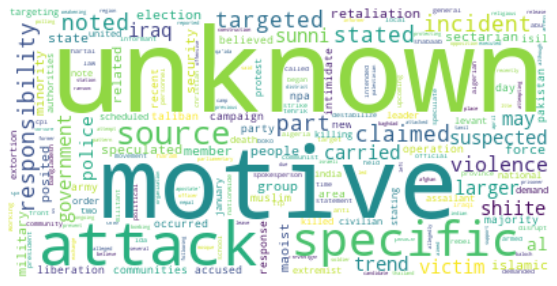

In [60]:
text = ' '.join(cleaned_corpus_asaf)
stopwords = set(wordcloud.STOPWORDS)

wc = wordcloud.WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

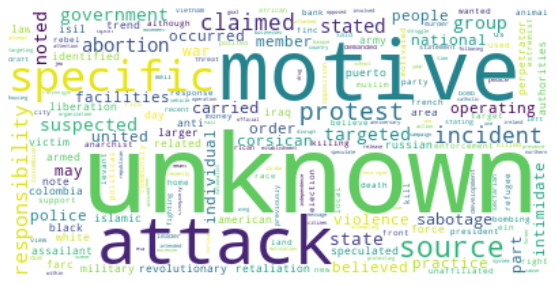

In [62]:
text = ' '.join(cleaned_corpus_ameu)
stopwords = set(wordcloud.STOPWORDS)

wc = wordcloud.WordCloud(stopwords=stopwords, background_color="white", collocations=False).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [140]:
terrorism_df['Weapon_type'].value_counts()

Explosives                                                                     24713
Firearms                                                                       14077
Incendiary                                                                      3520
Unknown                                                                         2656
Melee                                                                           1242
Chemical                                                                         121
Sabotage Equipment                                                                79
Other                                                                             64
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       44
Biological                                                                        23
Fake Weapons                                                                      13
Radiological                                                     

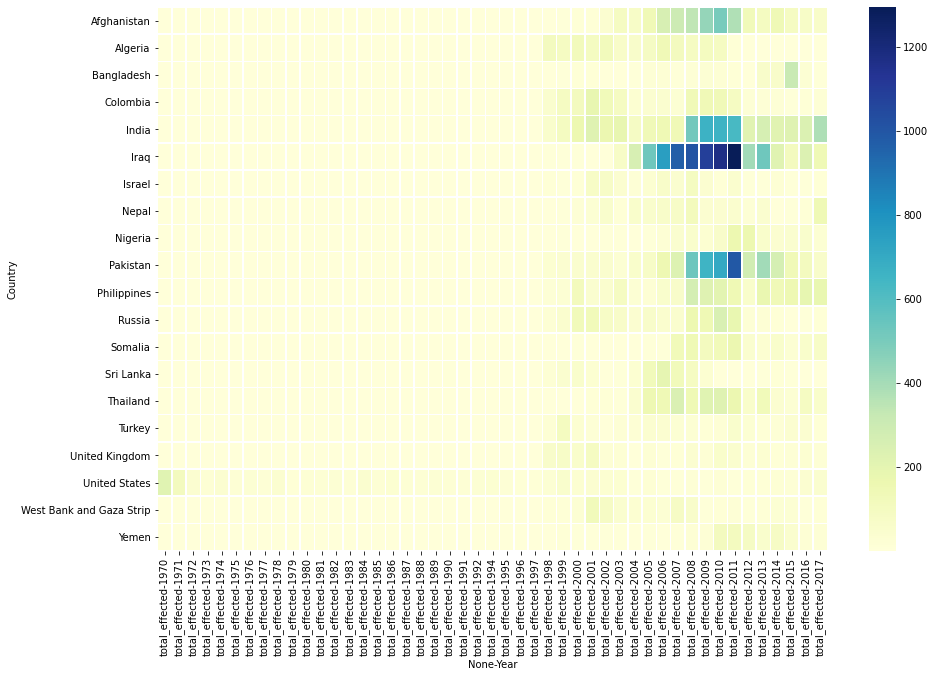

In [138]:
top_countries = list(terrorism_df['Country'].value_counts()[:20].keys())
terror_filter = terrorism_df[terrorism_df['Country'].isin(top_countries)]
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

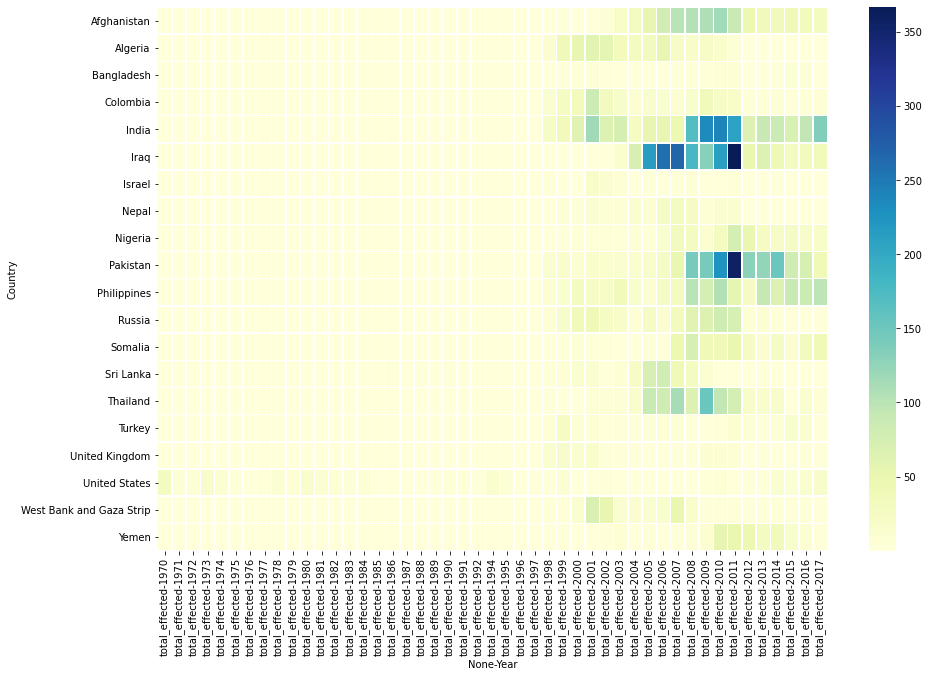

In [144]:
terror_filter = terrorism_df[terrorism_df['Country'].isin(top_countries)]
terror_filter = terror_filter[terror_filter['Weapon_type'] == 'Firearms']
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

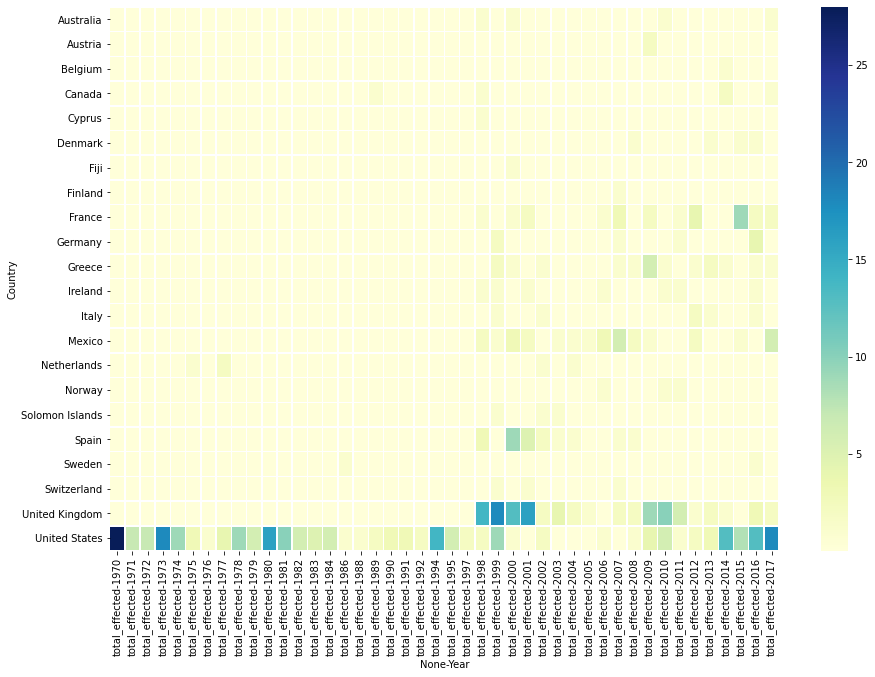

In [147]:
terror_filter = terrorism_df[terrorism_df['Region'].isin({'North America', 'Western Europe', 
                                                          'Australasia & Oceania'})]
terror_filter = terror_filter[terror_filter['Weapon_type'] == 'Firearms']
terror_filter = terror_filter[['Country', 'Year', 'total_effected']].groupby(['Country','Year']).count().unstack()
terror_filter = terror_filter.fillna(0)
f, ax = plt.subplots(figsize=(15, 10)) 
g = sns.heatmap(terror_filter, cmap='YlGnBu',linewidths=.5,vmin=0.01)
plt.show()

In [167]:
terrorism_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Target', 'Summary',
       'Group', 'Target_type', 'Weapon_type', 'Motive', 'total_effected'],
      dtype='object')

In [152]:
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

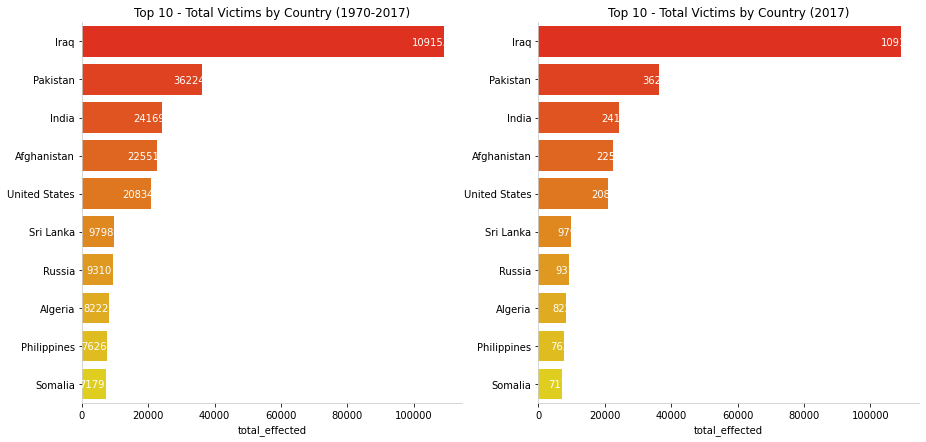

In [153]:
country_victims = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(by='total_effected', 
                                                                      ascending=False).loc[:, ['Country', 
                                                                                               'total_effected']]
country_victims = country_victims.iloc[:10, :]

terr_data_2017 = terrorism_df.query('Year == 2017')
country_victims_2017 = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(by='total_effected', 
                                                                      ascending=False).loc[:, ['Country', 
                                                                                               'total_effected']]
country_victims_2017 = country_victims_2017.iloc[:10, :]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

sns.barplot(x='total_effected', y='Country', data=country_victims, ci=None,
                 palette='autumn', ax=axs[0])
sns.barplot(x='total_effected', y='Country', data=country_victims_2017, ci=None,
                 palette='autumn', ax=axs[1])

format_spines(axs[0], right_border=False)
format_spines(axs[1], right_border=False)
axs[0].set_title('Top 10 - Total Victims by Country (1970-2017)')
axs[1].set_title('Top 10 - Total Victims by Country (2017)')
axs[0].set_ylabel('')
axs[1].set_ylabel('')

for p in axs[0].patches:
    width = p.get_width()
    axs[0].text(width-4000, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
            ha="center", color='white')

for p in axs[1].patches:
    width = p.get_width()
    axs[1].text(width-300, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
            ha="center", color='white')

plt.show()

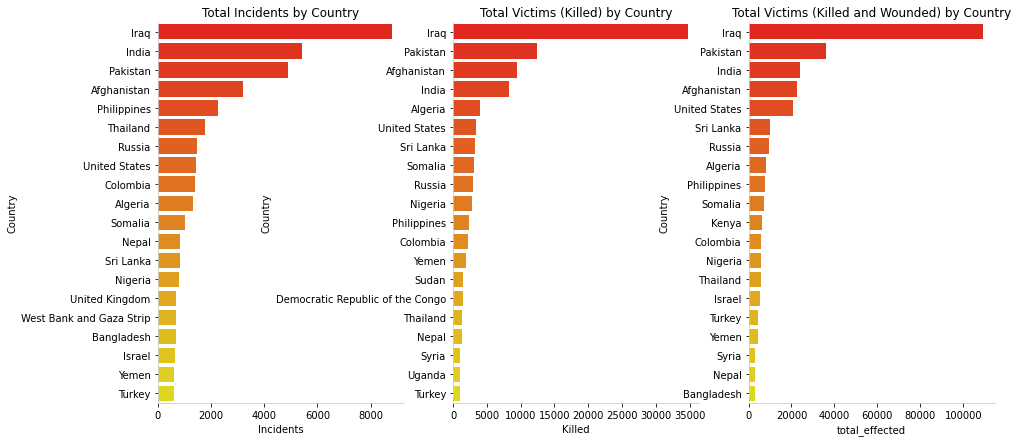

In [170]:
# Data Prep
country_incidents = terrorism_df.groupby(by='Country', as_index=False)['Year'].count() \
    .sort_values(by='Year', ascending=False)
country_incidents = country_incidents.rename(columns={'Year': 'Incidents'})
country_incidents = country_incidents.iloc[:20, :]

country_killed = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(
    by='Killed', ascending=False).loc[:, ['Country', 'Killed']]
country_killed = country_killed.iloc[:20, :]

country_victims = terrorism_df.groupby(by='Country', as_index=False).sum().sort_values(
    by='total_effected', ascending=False).loc[:, ['Country', 'total_effected']]
country_victims = country_victims.iloc[:20, :]

# Plot 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
sns.barplot(x='Incidents', y='Country', data=country_incidents, ci=None,
                 palette='autumn', ax=axs[0])
sns.barplot(x='Killed', y='Country', data=country_killed, ci=None,
                 palette='autumn', ax=axs[1])
sns.barplot(x='total_effected', y='Country', data=country_victims, ci=None,
                 palette='autumn', ax=axs[2])

format_spines(axs[0], right_border=False)
format_spines(axs[1], right_border=False)
format_spines(axs[2], right_border=False)

axs[0].set_title('Total Incidents by Country')
axs[1].set_title('Total Victims (Killed) by Country')
axs[2].set_title('Total Victims (Killed and Wounded) by Country')

# axs[0].set_ylabel('')
# axs[1].set_ylabel('')
# axs[2].set_ylabel('')

# for p in axs[0].patches:
#     width = p.get_width()
#     axs[0].text(width-4000, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
#             ha="center", color='white')

# for p in axs[1].patches:
#     width = p.get_width()
#     axs[1].text(width-300, p.get_y() + p.get_height() / 2. + 0.10, '{}'.format(int(width)), 
#             ha="center", color='white')

plt.show()